# TUBES MALIN 2
# Zendy Bramantia Alfareza (1301194145)
# Faishal Januarahman (1301194049)
# IF-43-02

---



In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

# **PRE PROCESSING DATA TRAINING**

In [ ]:
#Proses import data train
drive.mount('/content/drive')
df_train = pd.read_csv("/content/drive/MyDrive/Tubes Malin Classification/kendaraan_train.csv")
df_train.drop('id',axis='columns', inplace=True)
df_train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


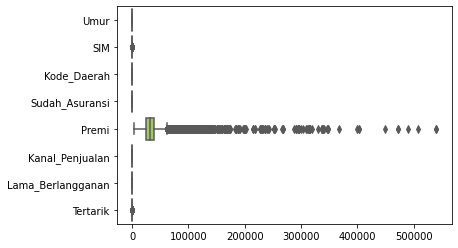

In [ ]:
# Menampilkan Boxplot
sns.boxplot(data= df_train, orient="h", palette="Set2")

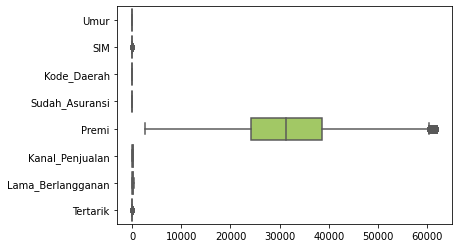

In [ ]:
# Proses Mengatasi data outlier 

def handlingOutlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    LB=q1 - (IQR * 1.5)
    UB=q3 + (IQR *1.5)
    hasil = data[((data>LB) & (data<UB))]
    return hasil

df_train['Premi'] = handlingOutlier(df_train['Premi'])
sns.boxplot(data= df_train, orient="h", palette="Set2")

In [ ]:
# ubah data kategorikal menjadi numerik
df_train['Jenis_Kelamin'].replace('Wanita', 0, inplace=True)
df_train['Jenis_Kelamin'].replace('Pria', 1, inplace=True)
df_train['Umur_Kendaraan'].replace('< 1 Tahun', 0, inplace=True)
df_train['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace=True)
df_train['Umur_Kendaraan'].replace('> 2 Tahun', 2, inplace=True)
df_train['Kendaraan_Rusak'].replace('Pernah', 1, inplace=True)
df_train['Kendaraan_Rusak'].replace('Tidak', 0, inplace=True)

df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [ ]:
# tampilkan nulldata
df_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# Proses mengubah data null menjadi rata2 kolom
x = pd.DataFrame(df_train)
df_train['Jenis_Kelamin'].fillna(value=x['Jenis_Kelamin'].mean(), inplace=True)
df_train['SIM'].fillna(value=x['SIM'].mean(), inplace=True)
df_train['Sudah_Asuransi'].fillna(value=x['Sudah_Asuransi'].mean(), inplace=True)
df_train['Umur_Kendaraan'].fillna(value=x['Umur_Kendaraan'].mean(), inplace=True)
df_train['Kendaraan_Rusak'].fillna(value=x['Kendaraan_Rusak'].mean(), inplace=True)
df_train['Premi'].fillna(value=x['Premi'].mean(), inplace=True)
df_train['Umur'].fillna(value=x['Umur'].mean(), inplace=True)
df_train['Kode_Daerah'].fillna(value=x['Kode_Daerah'].mean(), inplace=True)
df_train['Kanal_Penjualan'].fillna(value=x['Kanal_Penjualan'].mean(), inplace=True)
df_train['Lama_Berlangganan'].fillna(value=x['Lama_Berlangganan'].mean(), inplace=True)
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# Proses normalisasi data menggunakan MinMax Scaling
Scaller = MinMaxScaler()
Scaller.fit(df_train)
df_train = Scaller.transform(df_train)
df_train = pd.DataFrame(df_train, columns=['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik'])
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.153846,1.0,0.634615,1.0,0.0,0.000000,0.428914,0.932099,0.301038,0.0
1,1.000000,0.430769,1.0,0.750000,0.0,1.0,1.000000,0.391273,0.172840,0.512111,0.0
2,0.540467,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.508351,0.981481,0.377163,0.0
3,0.000000,0.584615,1.0,0.923077,0.0,0.5,0.000000,0.000000,0.759259,0.183391,0.0
4,1.000000,0.461538,1.0,0.673077,0.0,1.0,0.504791,0.544219,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.000000,0.046154,1.0,0.076923,1.0,0.0,0.000000,0.394448,0.932099,0.716263,0.0
285827,0.000000,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.710201,0.932099,0.138408,0.0
285828,0.000000,0.046154,1.0,0.961538,1.0,0.0,0.000000,0.795734,0.932099,0.747405,0.0
285829,1.000000,0.738462,1.0,0.134615,1.0,0.5,0.000000,0.470693,0.759259,0.899654,0.0


# **PRE PROCESSING DATA TESTING**

In [ ]:
#Proses import data test
drive.mount('/content/drive')
df_test = pd.read_csv("/content/drive/MyDrive/Tubes Malin Classification/kendaraan_test.csv")
df_test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
# tampilkan nulldata
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

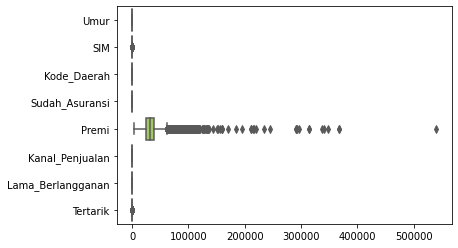

In [ ]:
# Menampilkan Boxplot
sns.boxplot(data= df_test, orient="h", palette="Set2")

In [ ]:
df_test['Jenis_Kelamin'].replace('Wanita', 0, inplace=True)
df_test['Jenis_Kelamin'].replace('Pria', 1, inplace=True)
df_test['Umur_Kendaraan'].replace('< 1 Tahun', 0, inplace=True)
df_test['Umur_Kendaraan'].replace('1-2 Tahun', 1, inplace=True)
df_test['Umur_Kendaraan'].replace('> 2 Tahun', 2, inplace=True)
df_test['Kendaraan_Rusak'].replace('Pernah', 1, inplace=True)
df_test['Kendaraan_Rusak'].replace('Tidak', 0, inplace=True)
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,1


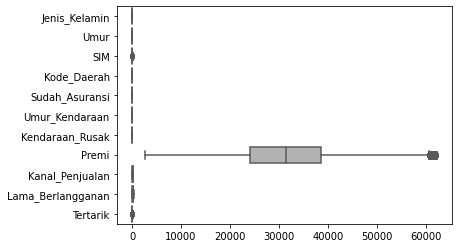

In [ ]:
# Proses Mengatasi data outlier 

def handlingOutlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    LB=q1 - (IQR * 1.5)
    UB=q3 + (IQR *1.5)
    hasil = data[((data>LB) & (data<UB))]
    return hasil

df_test['Premi'] = handlingOutlier(df_test['Premi'])
sns.boxplot(data= df_test, orient="h", palette="Set2")

In [ ]:
# Proses mengubah data null menjadi rata2 kolom
x = pd.DataFrame(df_test)
df_test['Jenis_Kelamin'].fillna(value=x['Jenis_Kelamin'].mean(), inplace=True)
df_test['SIM'].fillna(value=x['SIM'].mean(), inplace=True)
df_test['Sudah_Asuransi'].fillna(value=x['Sudah_Asuransi'].mean(), inplace=True)
df_test['Umur_Kendaraan'].fillna(value=x['Umur_Kendaraan'].mean(), inplace=True)
df_test['Kendaraan_Rusak'].fillna(value=x['Kendaraan_Rusak'].mean(), inplace=True)
df_test['Premi'].fillna(value=x['Premi'].mean(), inplace=True)
df_test['Umur'].fillna(value=x['Umur'].mean(), inplace=True)
df_test['Kode_Daerah'].fillna(value=x['Kode_Daerah'].mean(), inplace=True)
df_test['Kanal_Penjualan'].fillna(value=x['Kanal_Penjualan'].mean(), inplace=True)
df_test['Lama_Berlangganan'].fillna(value=x['Lama_Berlangganan'].mean(), inplace=True)
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# Proses normalisasi data menggunakan MinMax Scaling
Scaller = MinMaxScaler()
Scaller.fit(df_test)
df_test = Scaller.transform(df_test)
df_test = pd.DataFrame(df_test, columns=['Jenis_Kelamin','Umur','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik'])
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,1.0,0.153846,0.0,0.5,1.0,0.745581,0.154321,0.467128,0.0
1,1.0,0.030769,1.0,0.903846,1.0,0.0,0.0,0.622156,0.932099,0.799308,0.0
2,1.0,0.061538,1.0,0.538462,1.0,0.0,0.0,0.448850,0.932099,0.179931,0.0
3,1.0,0.400000,1.0,0.153846,1.0,0.5,0.0,0.565682,0.759259,0.083045,0.0
4,1.0,0.230769,1.0,0.442308,0.0,0.5,1.0,0.409226,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1.0,0.630769,1.0,0.884615,0.0,1.0,1.0,0.477775,0.759259,0.197232,0.0
47635,1.0,0.323077,1.0,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,1.0,0.061538,1.0,0.557692,1.0,0.0,0.0,0.512454,0.932099,0.695502,0.0
47637,1.0,0.600000,1.0,0.576923,0.0,0.5,1.0,0.591278,0.154321,0.792388,1.0


# **PEMODELAN**

In [ ]:
# Proses pemilihan data yang akan digunakan

#Data Test
x_test = df_test.drop('Tertarik', axis=1)
y_test = df_test["Tertarik"]

#Data Train
x_train = df_train.drop('Tertarik', axis=1)
y_train = df_train["Tertarik"]

In [ ]:
# Proses Klasifikasi menggunakan Gaussian Naive Bayes

NB = GaussianNB()
NB.fit(x_train, y_train) #Untuk melatih library Naive bayes terhadap x_train dan y_train
result = NB.predict(x_test) # Untuk memprediksi nilai dari kolom tertarik menggunakan library naive bayes

report = classification_report(y_test, result) # untuk menampilkan clasification report yang berisikan precision, recall, f1-score, jumlah data dan akurasi
f1 = f1_score(y_test, result) #
recall = recall_score(y_test, result)
precision = precision_score(y_test, result)
accuracy = accuracy_score(y_test, result)
conf_matrix = confusion_matrix(y_test, result)



print("Gaussian Naive Bayes")
print("Classification Report : \n", report)
print("Confusion Matrix : \n", conf_matrix)

print("F1-Score  : ", f1)
print("Recall    : ", recall)
print("Precision : ", precision)
print("Accuracy  : ", accuracy)


Gaussian Naive Bayes
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.66      0.79     41778
         1.0       0.28      0.92      0.43      5861

    accuracy                           0.69     47639
   macro avg       0.63      0.79      0.61     47639
weighted avg       0.90      0.69      0.75     47639

Confusion Matrix : 
 [[27608 14170]
 [  444  5417]]
F1-Score  :  0.4257309022320025
Recall    :  0.9242450093840642
Precision :  0.2765609843263389
Accuracy  :  0.6932345347299481


In [ ]:
#Proses Klasifikasi menggunakan Random Forest Classifier

RF = RandomForestClassifier(class_weight='balanced')
RF.fit(x_train, y_train)
result2 = RF.predict(x_test)

report_2 = classification_report(y_test, result2)
f1_2 = f1_score(y_test, result2)
recall_2 = recall_score(y_test, result2)
precision_2 = precision_score(y_test, result2)
accuracy_2 = accuracy_score(y_test, result2)
conf_matrix_2 = confusion_matrix(y_test, result2)

print("\nRandom Forrest")
print("Classification Report : \n", report_2)
print("Confusion Matrix : \n", conf_matrix_2)
print("F1-Score  : ", f1_2)
print("Recall    : ", recall_2)
print("Precision : ", precision_2)
print("Accuracy  : ", accuracy_2)



Random Forrest
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     41778
         1.0       0.37      0.10      0.15      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.54      0.54     47639
weighted avg       0.82      0.87      0.83     47639

Confusion Matrix : 
 [[40808   970]
 [ 5299   562]]
F1-Score  :  0.15203570945488976
Recall    :  0.09588807370755843
Precision :  0.3668407310704961
Accuracy  :  0.8684061378282499
